In [1]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.4/9.8 MB 11.2 MB/s eta 0:00:01
   --- ------------------------------------ 0.9/9.8 MB 11.2 MB/s eta 0:00:01
   ----- ---------------------------------- 1.4/9.8 MB 11.3 MB/s eta 0:00:01
   -------- ------------------------------- 2.0/9.8 MB 11.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.8 MB 11.4 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.8 MB 11.2 MB/s eta 0:00:01
   -------------- ------------------------- 3.5/9.8 MB 11.3 MB/s eta 0:00:01
   ---------------- ----------------------- 4.1/9.8 MB 11.3 MB/s eta 0:00:01
   ------------------ --------------------- 4.6/9.8 MB 11.4 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.8 MB 11.4 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.8 MB 11.7 MB/s eta 0:00:01
   ------------------------- -------------- 6.2/9.8 MB 11.3 MB/s eta 0:00:01
   ---

DEPRECATION: Loading egg at c:\users\mubashir khan\appdata\local\programs\python\python312\lib\site-packages\spylon_kernel-0+unknown-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\mubashir khan\appdata\local\programs\python\python312\lib\site-packages\spylon_kernel-0+unknown-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


object
float64


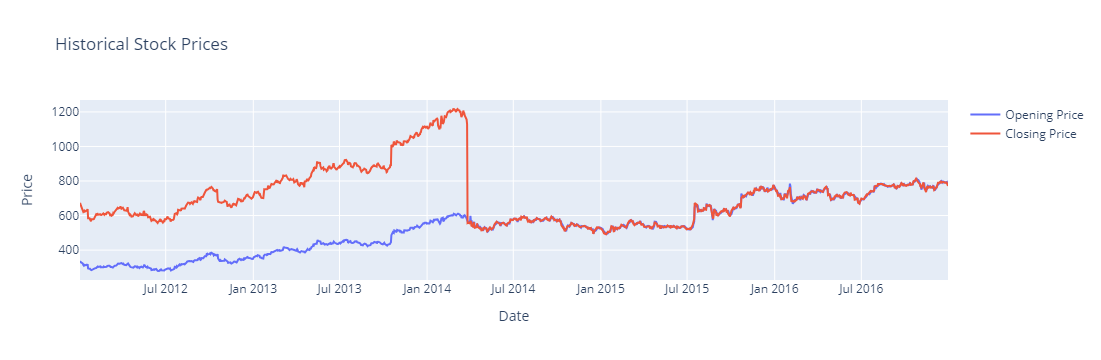

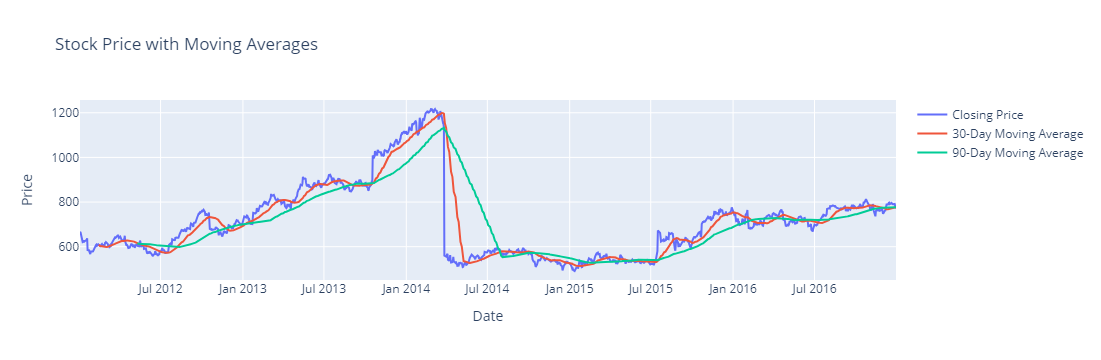

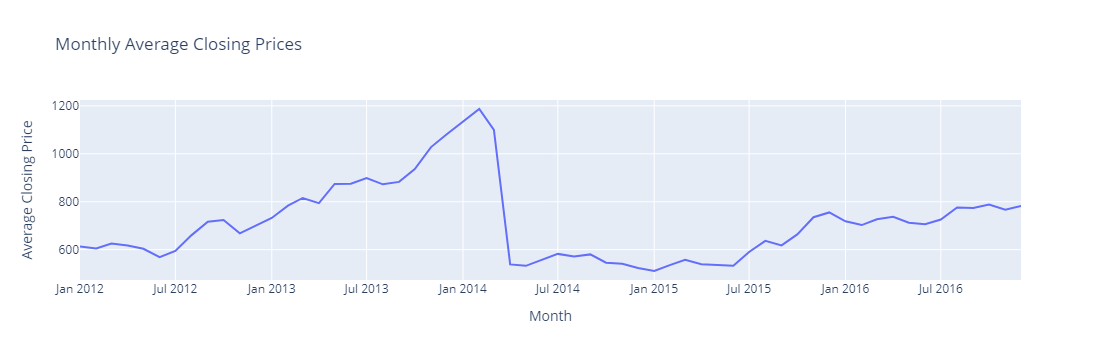

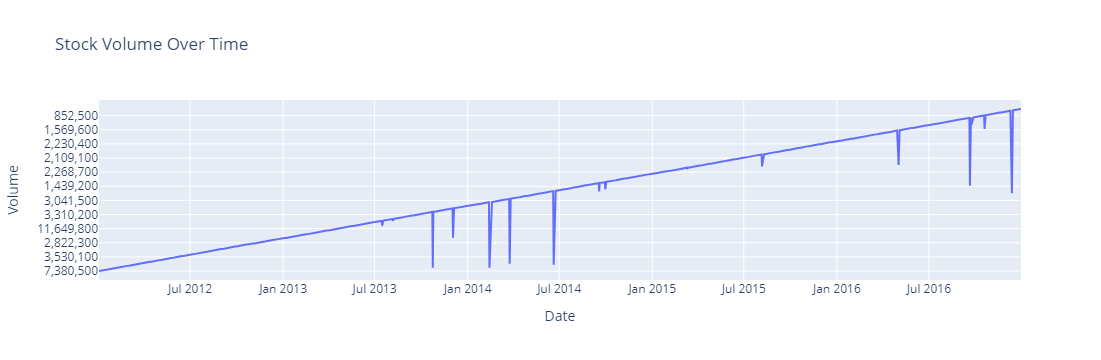

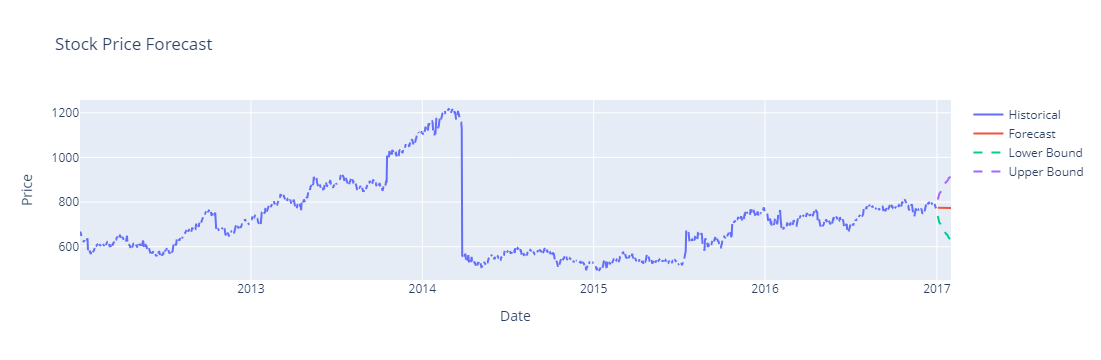

In [10]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA

# Load the datasets
train_file_path = r'C:\Users\MUBASHIR KHAN\Desktop\jupyter\DMV\Google_Stock_Price_Train.csv'
test_file_path = r'C:\Users\MUBASHIR KHAN\Desktop\jupyter\DMV\Google_Stock_Price_Test.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Ensure 'Date' column is in datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Set 'Date' as the index
train_df.set_index('Date', inplace=True)
test_df.set_index('Date', inplace=True)

# Check the data type of the 'Close' column
print(train_df['Close'].dtype)
print(test_df['Close'].dtype)

# Remove commas and convert 'Close' column to numeric if it's not already numeric
if train_df['Close'].dtype == 'object':
    train_df['Close'] = train_df['Close'].str.replace(',', '').astype(float)

if test_df['Close'].dtype == 'object':
    test_df['Close'] = test_df['Close'].str.replace(',', '').astype(float)

# Plot historical stock price trends using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['Open'], mode='lines', name='Opening Price'))
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['Close'], mode='lines', name='Closing Price'))
fig.update_layout(title='Historical Stock Prices', xaxis_title='Date', yaxis_title='Price')
fig.show()

# Calculate and plot moving averages
train_df['30_Day_MA'] = train_df['Close'].rolling(window=30).mean()
train_df['90_Day_MA'] = train_df['Close'].rolling(window=90).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['Close'], mode='lines', name='Closing Price'))
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['30_Day_MA'], mode='lines', name='30-Day Moving Average'))
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['90_Day_MA'], mode='lines', name='90-Day Moving Average'))
fig.update_layout(title='Stock Price with Moving Averages', xaxis_title='Date', yaxis_title='Price')
fig.show()

# Perform seasonality analysis
train_df['Month'] = train_df.index.to_period('M')
monthly_avg = train_df.groupby('Month')['Close'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].astype(str)

fig = px.line(monthly_avg, x='Month', y='Close', title='Monthly Average Closing Prices')
fig.update_layout(xaxis_title='Month', yaxis_title='Average Closing Price')
fig.show()

# Analyze correlation with other variables
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['Volume'], mode='lines', name='Volume'))
fig.update_layout(title='Stock Volume Over Time', xaxis_title='Date', yaxis_title='Volume')
fig.show()

# Forecast future stock prices using ARIMA
# Prepare data for ARIMA
train_df = train_df.asfreq('D')
model = ARIMA(train_df['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.get_forecast(steps=len(test_df))
forecast_index = test_df.index
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot forecast
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['Close'], mode='lines', name='Historical'))
fig.add_trace(go.Scatter(x=forecast_index, y=forecast_mean, mode='lines', name='Forecast'))
fig.add_trace(go.Scatter(x=forecast_index, y=forecast_conf_int.iloc[:, 0], mode='lines', name='Lower Bound', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=forecast_index, y=forecast_conf_int.iloc[:, 1], mode='lines', name='Upper Bound', line=dict(dash='dash')))
fig.update_layout(title='Stock Price Forecast', xaxis_title='Date', yaxis_title='Price')
fig.show()